
## Brent Oil Price Analysis - Task 1
This script implements Task 1 of the challenge, focusing on defining the data analysis workflow
and understanding the model and data.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# Import utility functions
from scripts.oil_analysis_utils import *  

### Data Loading and Preprocessing

In [4]:

df = load_and_preprocess_data('../data/Copy of BrentOilPrices.csv')

In [5]:
df.head(10)

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58
1987-06-01,18.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


In [7]:
# Data quality validation
quality_checks = validate_data_quality(df)
print("\nData Quality Check Results:")
print("Missing Values:", quality_checks['missing_values'])
print("Duplicate Entries:", quality_checks['duplicates'])


Data Quality Check Results:
Missing Values: Price    0
dtype: int64
Duplicate Entries: 0


In [8]:
print("\nOutliers Detection:")
for col, outliers in quality_checks['outliers'].items():
    print(f"{col}:")
    print(f"  Z-score outliers: {outliers['z_score_outliers']}")
    print(f"  IQR outliers: {outliers['iqr_outliers']}")


Outliers Detection:
Price:
  Z-score outliers: 0
  IQR outliers: 0


In [9]:
# Handle Missing Values
df, missing_values = handle_missing_values(df)
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Price    0
dtype: int64


In [10]:
# Feature Engineering

df = add_features(df)
print("Dataset with new features:")
df.head()

Dataset with new features:


,Price,Returns,Volatility,MA_50,MA_200,Momentum,Log_Returns
Date,,,,,,,
1987-05-20,18.63,NaN,NaN,NaN,NaN,NaN,NaN
1987-05-21,18.45,-0.009662,NaN,NaN,NaN,NaN,-0.009709
1987-05-22,18.55,0.005420,NaN,NaN,NaN,NaN,0.005405
1987-05-25,18.60,0.002695,NaN,NaN,NaN,NaN,0.002692
1987-05-26,18.63,0.001613,NaN,NaN,NaN,NaN,0.001612


In [11]:
# Analyze price distribution
price_dist = analyze_distribution(df['Price'])
print("\nPrice Distribution Analysis:")
print("Normality Tests:")
print(f"Shapiro-Wilk test p-value: {price_dist['normality']['shapiro'][1]:.4f}")
print(f"Jarque-Bera test p-value: {price_dist['normality']['jarque_bera'][1]:.4f}")
print("\nDescriptive Statistics:")
print(f"Skewness: {price_dist['descriptive']['skewness']:.4f}")
print(f"Kurtosis: {price_dist['descriptive']['kurtosis']:.4f}")


Price Distribution Analysis:
Normality Tests:
Shapiro-Wilk test p-value: 0.0000
Jarque-Bera test p-value: 0.0000

Descriptive Statistics:
Skewness: 0.7652
Kurtosis: -0.6108


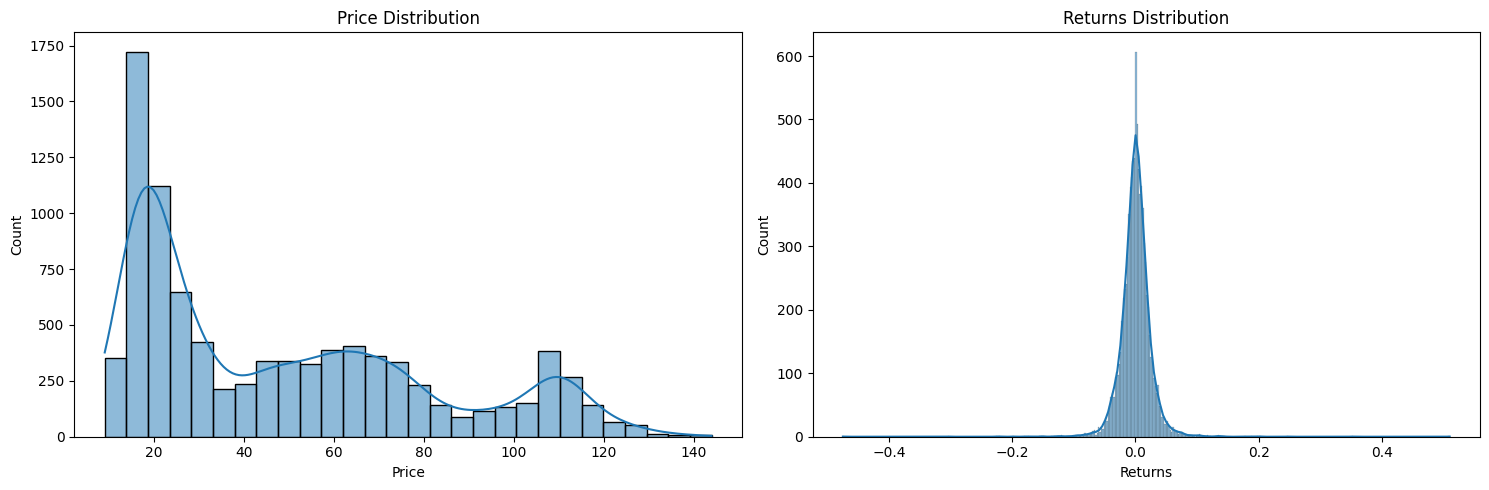

In [12]:
# Visualize distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Returns'].dropna(), kde=True)
plt.title('Returns Distribution')
plt.tight_layout()
plt.show()

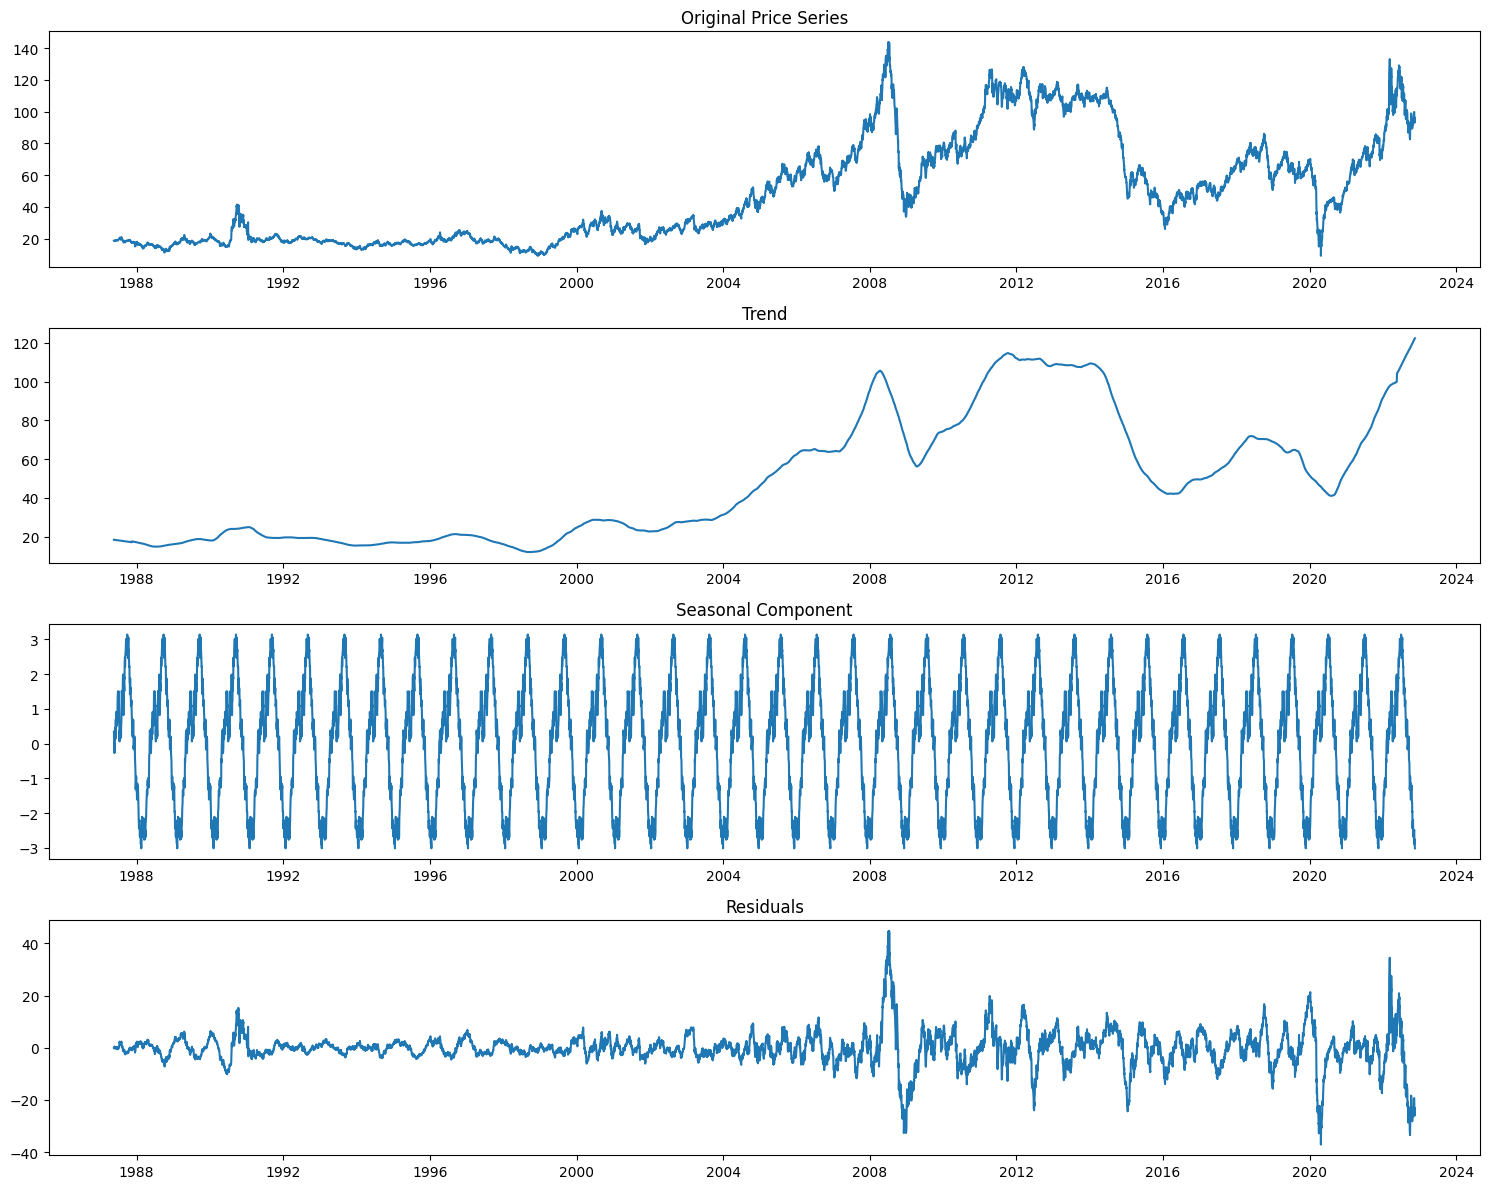

In [13]:
# Analyze seasonality
seasonal_decomp = analyze_seasonality(df['Price'])

# %%
# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
ax1.plot(df.index, df['Price'])
ax1.set_title('Original Price Series')
ax2.plot(df.index, seasonal_decomp['trend'])
ax2.set_title('Trend')
ax3.plot(df.index, seasonal_decomp['seasonal'])
ax3.set_title('Seasonal Component')
ax4.plot(df.index, seasonal_decomp['residual'])
ax4.set_title('Residuals')
plt.tight_layout()
plt.show()

In [14]:
# Calculate risk metrics
risk_metrics = calculate_risk_metrics(df['Returns'].dropna())
print("\nRisk Metrics:")
print(f"Value at Risk (5%): {risk_metrics['VaR']:.4f}")
print(f"Conditional VaR: {risk_metrics['CVaR']:.4f}")
print(f"Annual Volatility: {risk_metrics['volatility']:.4f}")
print(f"Downside Risk: {risk_metrics['downside_risk']:.4f}")


Risk Metrics:
Value at Risk (5%): -0.0357
Conditional VaR: -0.0546
Annual Volatility: 0.4009
Downside Risk: 0.3020


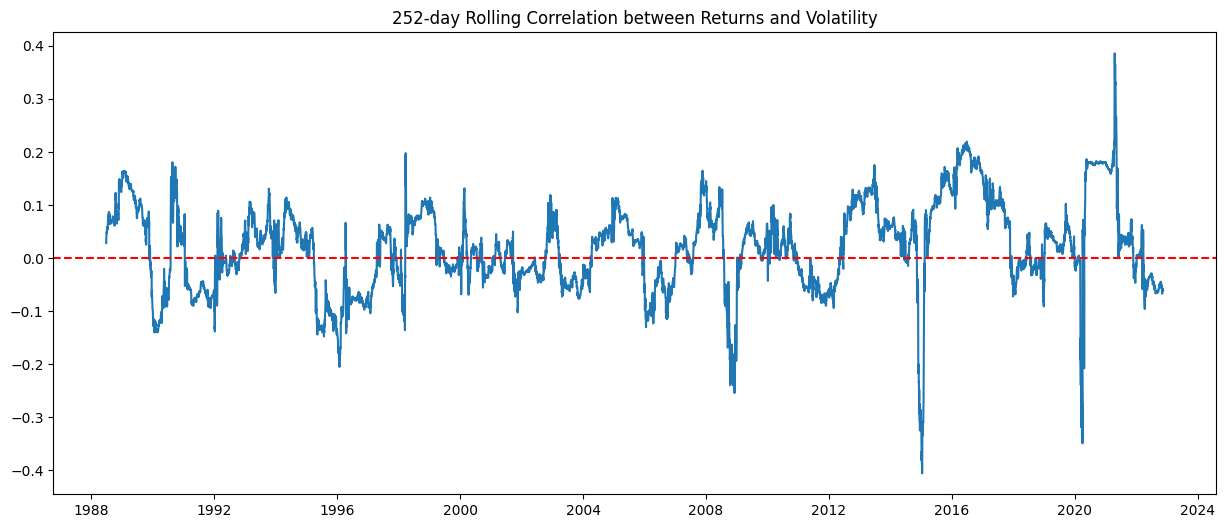

In [15]:
window = 252  # One trading year
rolling_corr = df[['Returns', 'Volatility']].rolling(window=window).corr()
rolling_corr = rolling_corr.unstack()['Returns']['Volatility']

plt.figure(figsize=(15, 6))
plt.plot(rolling_corr.index, rolling_corr.values)
plt.title(f'{window}-day Rolling Correlation between Returns and Volatility')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

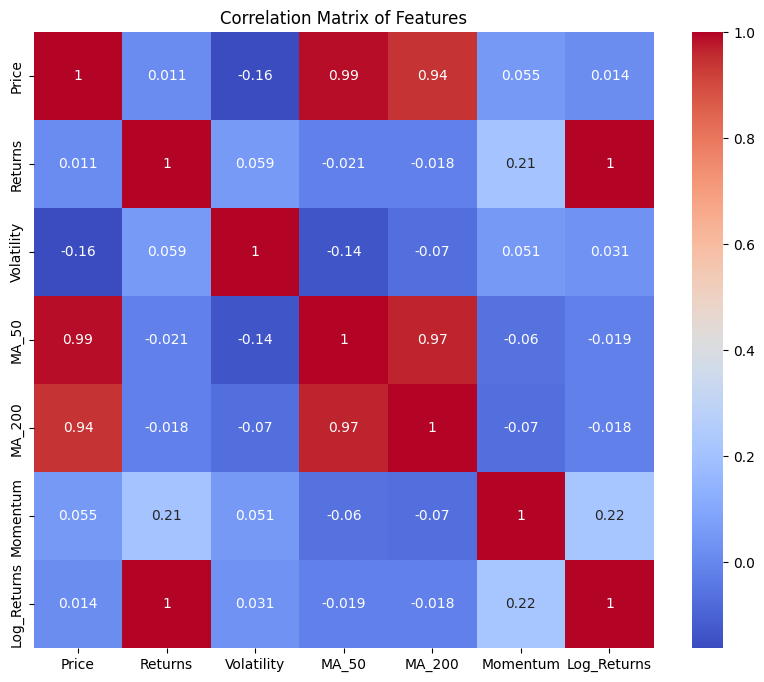

In [16]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


Performing time series analysis...


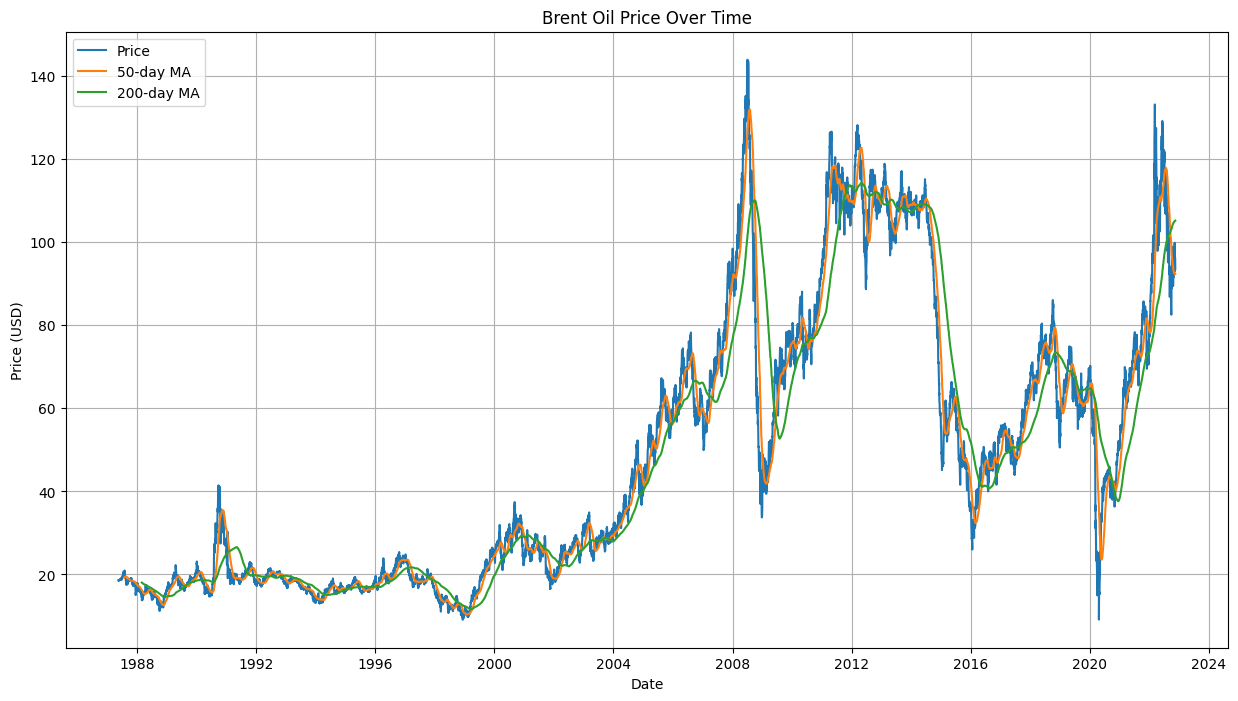

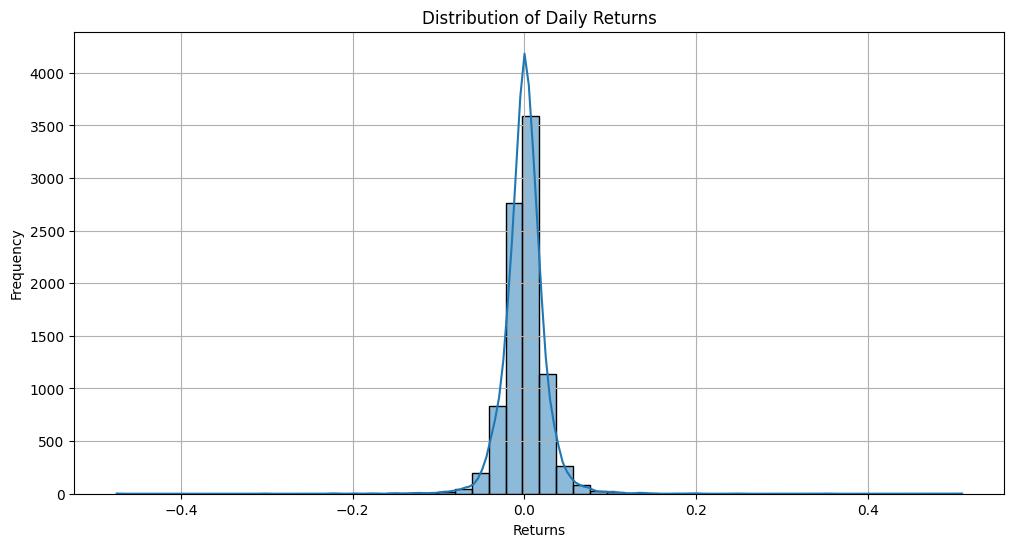

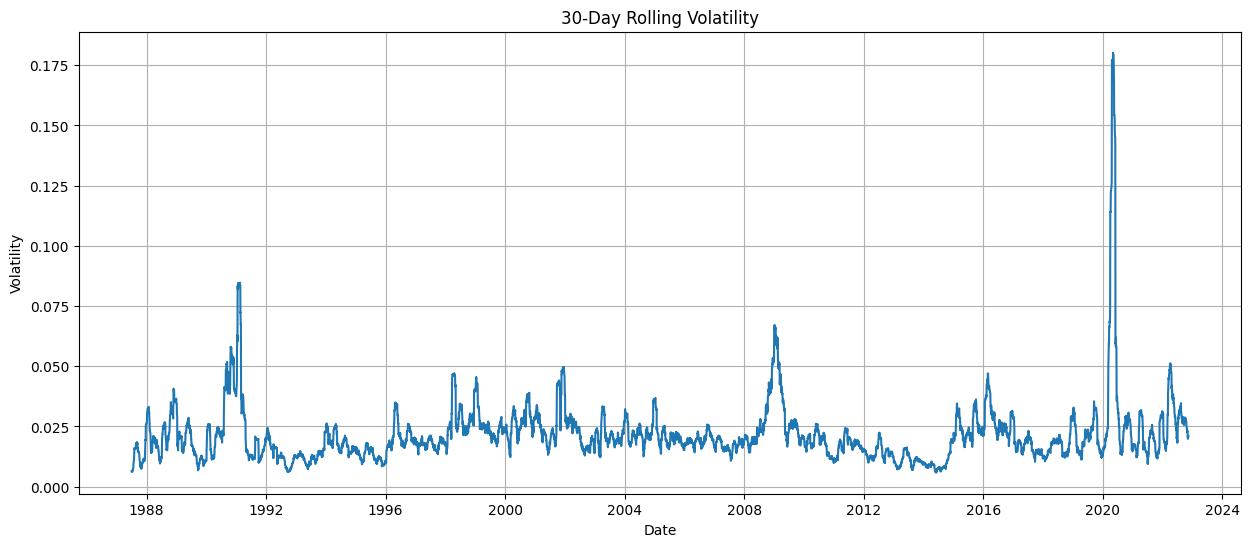

In [17]:
# Time Series Analysis
print("\nPerforming time series analysis...")
plot_time_series(df)
plot_returns_distribution(df)
plot_volatility(df)

In [18]:
 # Stationarity Testing
print("\nChecking stationarity...")
price_stationarity = check_stationarity(df['Price'])
print("Stationarity Test Results for Price:")
price_stationarity


Checking stationarity...
Stationarity Test Results for Price:


{'ADF Statistic': np.float64(-1.993856011392467),
 'p-value': np.float64(0.2892735048934032),
 'Critical values': {'1%': np.float64(-3.4310783342658615),
  '5%': np.float64(-2.861861876398633),
  '10%': np.float64(-2.566941329781918)}}

In [19]:
returns_stationarity = check_stationarity(df['Returns'].dropna())
print("\nStationarity Test Results for Returns:")
returns_stationarity


Stationarity Test Results for Returns:


{'ADF Statistic': np.float64(-17.11168481990269),
 'p-value': np.float64(7.35823036703151e-30),
 'Critical values': {'1%': np.float64(-3.431078253154464),
  '5%': np.float64(-2.8618618405570615),
  '10%': np.float64(-2.5669413107032493)}}


Analyzing autocorrelation...
Autocorrelation Analysis for Prices:


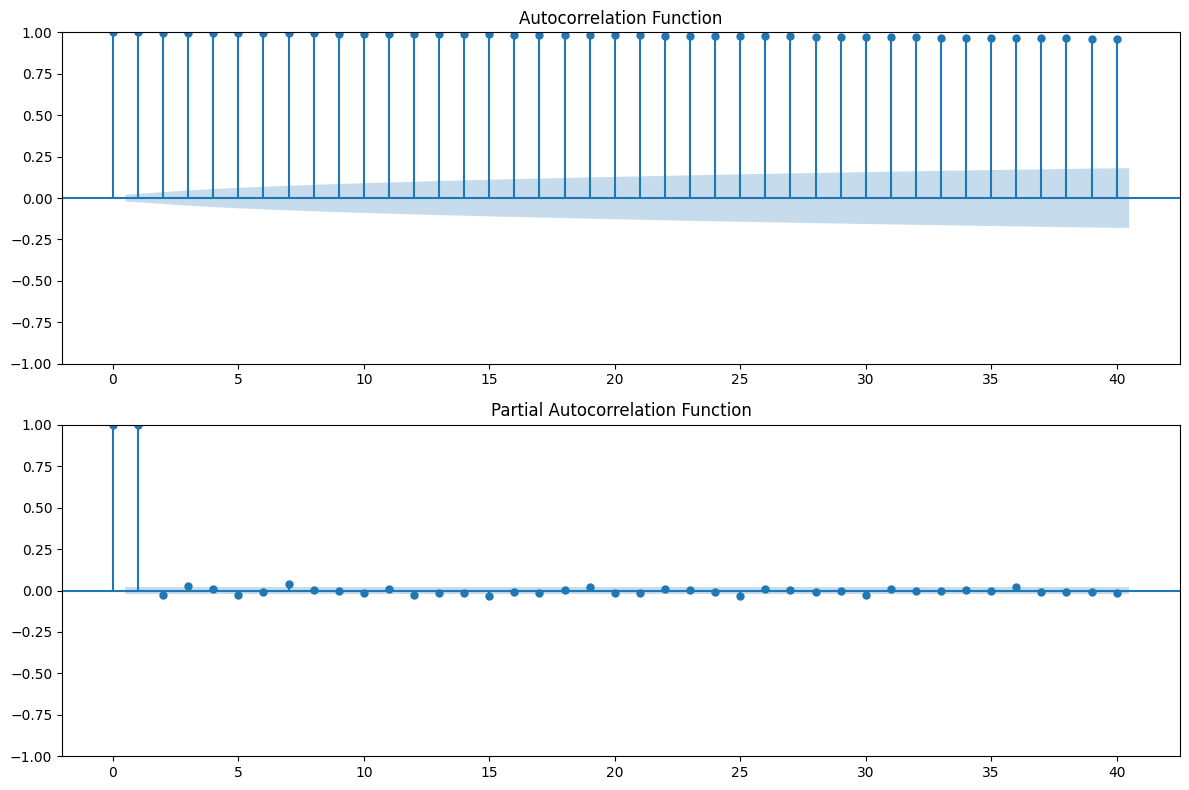


Autocorrelation Analysis for Returns:


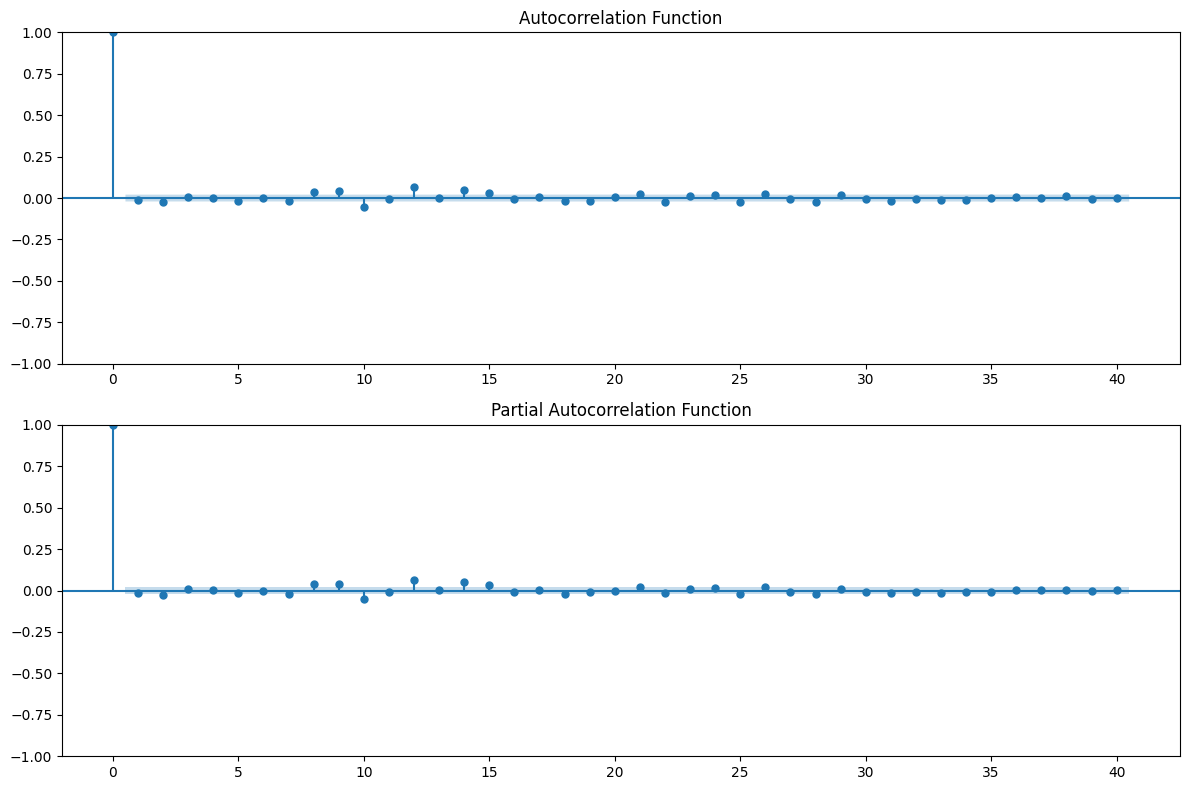

In [20]:
# 6. Autocorrelation Analysis
print("\nAnalyzing autocorrelation...")
print("Autocorrelation Analysis for Prices:")
analyze_autocorrelation(df['Price'])
    
print("\nAutocorrelation Analysis for Returns:")
analyze_autocorrelation(df['Returns'].dropna())

### Summary Statistics

In [21]:

print("\nGenerating summary statistics...")
summary_stats = generate_summary_statistics(df)
print("Dataset Summary:")
print(f"Date Range: {summary_stats['date_range']['start'].date()} to {summary_stats['date_range']['end'].date()}")
print(f"Total Trading Days: {summary_stats['date_range']['total_days']}\n")



Generating summary statistics...
Dataset Summary:
Date Range: 1987-05-20 to 2022-11-14
Total Trading Days: 9011



In [22]:
print("Price Statistics:")
for key, value in summary_stats['price_statistics'].items():
    print(f"{key.capitalize()}: ${value:.2f}")

Price Statistics:
Mean: $48.42
Std: $32.86
Min: $9.10
Max: $143.95
Median: $38.57


In [23]:
print("\nReturns Statistics:")
for key, value in summary_stats['returns_statistics'].items():
     print(f"{key.capitalize()}: {value:.4f}")



Returns Statistics:
Mean: 0.0005
Std: 0.0253
Skewness: 0.3116
Kurtosis: 45.4056


In [24]:
print("\nVolatility Statistics:")
for key, value in summary_stats['volatility_statistics'].items():
    print(f"{key.capitalize()}: {value:.4f}")


Volatility Statistics:
Mean: 0.0215
Std: 0.0132
Max: 0.1802
